# Fifa 19 Player Classification with ANN

## Import libraries

In [324]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
print("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)

#Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

Tensorflow version: 2.18.0
Keras version: 3.8.0


## Load data

In [325]:
ATT_FILE = "/kaggle/input/footballplayers/FootballPlayerPreparedCleanAttributes.csv"
LABEL_FILE = "/kaggle/input/footballplayers/FootballPlayerOneHotEncodedClasses.csv"

TRAIN_RATE=0.8

attributes = pd.read_csv(ATT_FILE)
label = pd.read_csv(LABEL_FILE)

n_instances = attributes.shape[0]
n_train = int(n_instances*TRAIN_RATE)
n_dev = int((n_instances-n_train)/2)

x_train = attributes.values[:n_train]
t_train = label.values[:n_train]

x_dev = attributes.values[n_train:n_train+n_dev]
t_dev = label.values[n_train:n_train+n_dev]

print ("x_train:",x_train.shape)
print ("t_train:",t_train.shape)

print ("x_dev:",x_dev.shape)
print ("t_dev:",t_dev.shape)

x_train: (12907, 22)
t_train: (12907, 4)
x_dev: (1613, 22)
t_dev: (1613, 4)


In [326]:
print("Training samples: ", len(x_train))
print("Validation samples: ", len(x_dev))
print("Testing samples: ", len(t_dev))

Training samples:  12907
Validation samples:  1613
Testing samples:  1613


## Initialize variables

In [327]:
INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES = int (round (x_dev.shape[0]/1))

## Set hyperparameters

In [328]:
n_epochs = 500
lr = 0.001
batch_size = 128
momentun = 0.9

## Build the deep neural model

Using **the functional API**, the Input layer defines the shape of each data element to expect as a tuple.
* The Input layer defines the shape of each data element to expect as a tuple.
* The Dense layers contain a number of neurons that are densely connected to the previous layer (every unit in the layer is connected to every unit in the previous layer).

In [329]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.layers import (
    Dense, Activation, Flatten, BatchNormalization, 
    Dropout, Input, ELU
)



# Modelo sequencial. Feed Forward. 
model = Sequential([keras.layers.Input(shape=(INPUTS,))])

# 1 capa oculta
model.add(Dense(256, kernel_initializer='he_normal', use_bias=False, kernel_regularizer=regularizers.l2(1e-5) ))
model.add(BatchNormalization())
model.add(ELU(alpha=1.0))
model.add(Dropout(0.25))

# 2 capa oculta
model.add(Dense(256, kernel_initializer='he_normal', use_bias=False,  kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ELU(alpha=1.0))
model.add(Dropout(0.25))

# 3 capa oculta
model.add(Dense(256, kernel_initializer='he_normal', use_bias=False,  kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ELU(alpha=1.0))
model.add(Dropout(0.15))




# 4 capa oculta
# model.add(Dense(256, kernel_initializer='he_normal', use_bias=False,  kernel_regularizer=regularizers.l2(1e-4)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

# # 5 capa oculta
# model.add(Dense(256, kernel_initializer='he_normal', use_bias=False,  kernel_regularizer=regularizers.l2(1e-4)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

# Capa de clasificación
model.add(Dense(
    4,
    activation='softmax',
    kernel_initializer='glorot_uniform'
))


model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                │ (None, 256)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_50 (ELU)                    │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 256)            │        65,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_51 (ELU)                    │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 256)            │        65,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_52 (ELU)                    │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,804 (550.02 KB)

 Trainable params: 139,268 (544.02 KB)

 Non-trainable params: 1,536 (6.00 KB)

For example, the last layer's kernel comprises 78 parameters to adjust: 25 neurons in the previous layer by 3 neurons in the output layer plus the 3 biases, one for each output neuron.

## Compile the model

Available loss functions, optimizers, and metrics at: https://keras.io/losses/, https://keras.io/optimizers/ and https://keras.io/metrics/.

In [330]:

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import AdamW

# Learning rate is changed to 0.001
opt = Adam(learning_rate=lr, beta_1=momentun, beta_2=0.999, epsilon=1e-8, amsgrad=True, clipnorm=1.0)
model.compile(optimizer=opt, loss=tf.keras.losses.categorical_crossentropy, metrics=['categorical_accuracy'])

# model.compile(loss=tf.keras.losses.categorical_crossentropy,
#               optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
#               metrics=["categorical_accuracy"])

## Train the model with M-BGD

In [331]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import time

checkpoint = ModelCheckpoint(
    'mejores_pesos.weights.h5',
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True,
    save_weights_only=True,
    verbose=0
)

reduce_lr = ReduceLROnPlateau('val_loss', factor=0.5, patience=50, verbose=1)


callbacks = [checkpoint,reduce_lr ]

start = time.perf_counter()
history = model.fit(x_train, t_train, batch_size=batch_size, epochs=n_epochs, verbose=0, validation_data=(x_dev, t_dev), callbacks=callbacks)
print (time.perf_counter() - start)

# Cargar los mejores pesos al terminar
model.load_weights('mejores_pesos.weights.h5')


Epoch 150: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 205: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 258: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 308: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 358: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 408: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 458: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
173.94509337899945


## Get the results

In [332]:
results=pd.DataFrame(history.history)

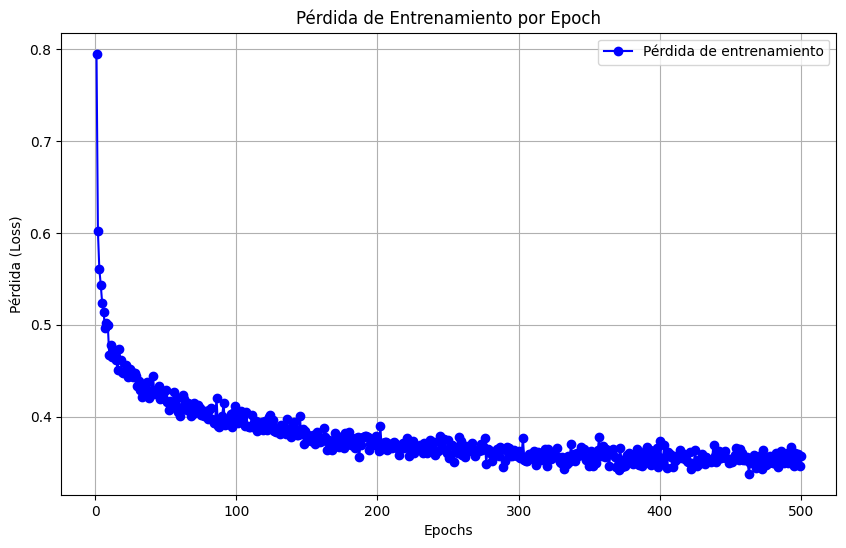

In [333]:
import matplotlib.pyplot as plt

# Obtener los valores de pérdida (loss) y pérdida de validación (val_loss) del historial
loss = history.history['loss']
epochs = range(1, len(loss) + 1) # Crear un rango de epochs

# Configurar la gráfica
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Pérdida de entrenamiento') # 'bo' para puntos azules

# Añadir títulos y etiquetas
plt.title('Pérdida de Entrenamiento por Epoch')
plt.xlabel('Epochs')
plt.ylabel('Pérdida (Loss)')
plt.legend() # Mostrar la leyenda
plt.grid(True) # Opcional: añade una cuadrícula

# Mostrar la gráfica
plt.show()

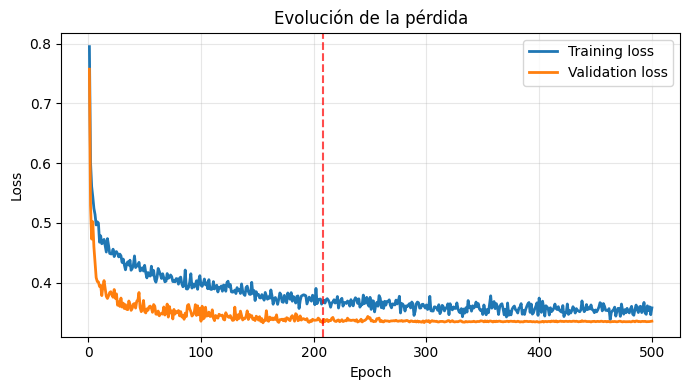

In [334]:
# Test overfitting

train_loss = history.history['loss']
val_loss   = history.history['val_loss']
epochs_axis = np.arange(1, len(train_loss) + 1)

plt.figure(figsize=(7,4))
plt.plot(epochs_axis, train_loss, label='Training loss', linewidth=2)     # línea 1 (color automático)
plt.plot(epochs_axis, val_loss,   label='Validation loss', linewidth=2)   # línea 2 (otro color)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Evolución de la pérdida')
plt.legend()
plt.grid(alpha=0.3)


best_idx = int(np.argmin(val_loss))   # índice del mínimo
best_epoch = best_idx + 1             # convertir de índice a número de época

# Línea discontinua en la mejor época
plt.axvline(best_epoch, linestyle='--', color='red', alpha=0.7)
# Marca visual del mejor epoch según val_accuracy (reutilizamos best_idx)

plt.tight_layout()
plt.show()


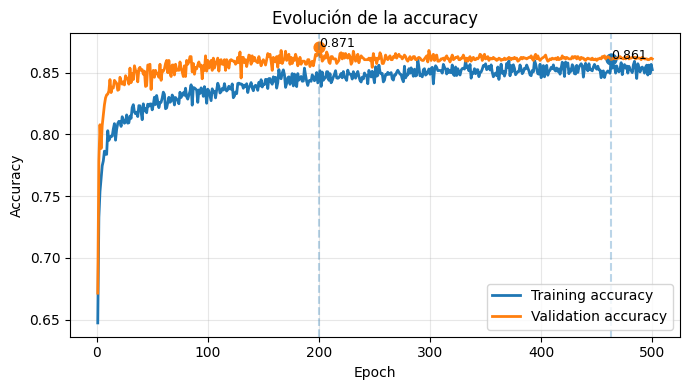

In [335]:
# --- Accuracy history (categorical_accuracy) ---
train_acc = history.history['categorical_accuracy']
val_acc   = history.history['val_categorical_accuracy']

epochs_axis = np.arange(1, len(train_acc) + 1)

# Índice (0-based) y valor del mejor accuracy de training y validación
best_train_idx = np.argmax(train_acc)
best_val_idx   = np.argmax(val_acc)

best_train_acc = train_acc[best_train_idx]
best_val_acc   = val_acc[best_val_idx]

plt.figure(figsize=(7,4))
plt.plot(epochs_axis, train_acc, label='Training accuracy', linewidth=2)
plt.plot(epochs_axis, val_acc,   label='Validation accuracy', linewidth=2)

# Puntos marcando el mejor accuracy de cada curva
plt.scatter(best_train_idx + 1, best_train_acc, s=60, marker='o')
plt.scatter(best_val_idx   + 1, best_val_acc,   s=60, marker='o')

# Líneas verticales opcionales
plt.axvline(best_train_idx + 1, linestyle='--', alpha=0.3)
plt.axvline(best_val_idx   + 1, linestyle='--', alpha=0.3)

# Anotaciones con el valor
plt.annotate(f'{best_train_acc:.3f}',
             xy=(best_train_idx + 1, best_train_acc),
             xytext=(best_train_idx + 1 + 0.2, best_train_acc),
             fontsize=9)

plt.annotate(f'{best_val_acc:.3f}',
             xy=(best_val_idx + 1, best_val_acc),
             xytext=(best_val_idx + 1 + 0.2, best_val_acc),
             fontsize=9)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Evolución de la accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [336]:
history.params

{'verbose': 0, 'epochs': 500, 'steps': 101}

In [337]:
results[-1:]

,categorical_accuracy,loss,val_categorical_accuracy,val_loss,learning_rate
499,0.852406,0.357635,0.861128,0.335334,0.000008


In [338]:
print ("Accuracy for the training set: ", results.categorical_accuracy.values[-1:][0])

Accuracy for the training set:  0.8524056673049927


In [339]:
print ("Accuracy for the development test set: ", results.val_categorical_accuracy.values[-1:][0])

Accuracy for the development test set:  0.8611283302307129


## Final Test

We are suppossing that this is the final model that achieves the best performance.

### Get the final test set

In [340]:
n_final_test = n_instances-n_train-n_dev

x_final_test = attributes.values[n_train+n_dev:n_instances]
t_final_test = label.values[n_train+n_dev:n_instances]

print ("x_test:",x_final_test.shape)
print ("t_test:",t_final_test.shape)

x_test: (1614, 22)
t_test: (1614, 4)


### Evaluate the model

In [341]:
model.evaluate(x_final_test, t_final_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.8375 - loss: 0.3636


[0.36725616455078125, 0.8382899761199951]

In [342]:
from collections import Counter

test_predictions=model.predict(x_final_test)
test_rounded_predictions=np.round(test_predictions)
test_correct_predictions = np.equal(np.argmax(test_rounded_predictions,1),np.argmax(t_final_test,1))
final_test_prediction_results=Counter(test_correct_predictions)
final_test_prediction_results

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Counter({True: 1352, False: 262})

In [343]:
final_test_prediction_results[True]/sum(final_test_prediction_results.values())

0.8376703841387856

### Confusion Matrix on the final test set

In [344]:
test_sparse_predictions = np.argmax (test_predictions,axis=1)
test_sparse_targets = np.argmax(t_final_test, axis=1)
print('Confusion Matrix')
c_m=pd.DataFrame(confusion_matrix(test_sparse_predictions,test_sparse_targets),columns=['Poor', 'Intermediate', 'Good players', 'Excellent'])
c_m.insert(0,'Classes',['Poor', 'Intermediate', 'Good players', 'Excellent'])
c_m['Sum']=c_m.sum(axis=1, numeric_only=True)
c_m

Confusion Matrix


,Classes,Poor,Intermediate,Good players,Excellent,Sum
0,Poor,403,60,0,0,463
1,Intermediate,32,302,61,0,395
2,Good players,0,51,360,37,448
3,Excellent,0,0,20,288,308


Confusion Matrix (values):
[[403  32   0   0]
 [ 60 302  51   0]
 [  0  61 360  20]
 [  0   0  37 288]]


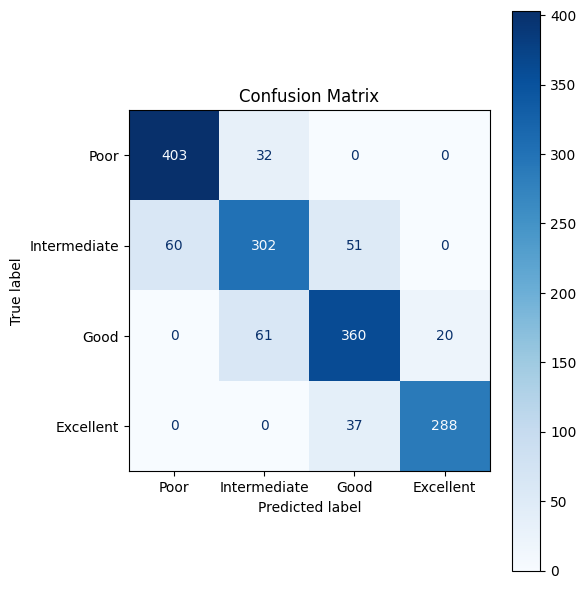

In [345]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicciones y etiquetas verdaderas
test_sparse_predictions = np.argmax(test_predictions, axis=1)
test_sparse_targets     = np.argmax(t_final_test, axis=1)

# Nombres de clases
class_names = ['Poor', 'Intermediate', 'Good', 'Excellent']

# OJO: confusion_matrix(y_true, y_pred)
cm = confusion_matrix(test_sparse_targets, test_sparse_predictions)

print('Confusion Matrix (values):')
print(cm)

# Plot típico de matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=True)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


### Clasification metrics

In [346]:
print('Classification Report')
classes = ['Poor', 'Intermediate', 'Good players', 'Excellent']
print(classification_report(test_sparse_targets, test_sparse_predictions, target_names=classes))

Classification Report
              precision    recall  f1-score   support

        Poor       0.87      0.93      0.90       435
Intermediate       0.76      0.73      0.75       413
Good players       0.80      0.82      0.81       441
   Excellent       0.94      0.89      0.91       325

    accuracy                           0.84      1614
   macro avg       0.84      0.84      0.84      1614
weighted avg       0.84      0.84      0.84      1614



The classification metrics improve with respect to those from the one-hidden layer neural model. Again, the class *Average* achieves the worst results.